In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv"
df=pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualization and Anylisis 

In [4]:
df['custcat'].head(10)

0    1
1    4
2    3
3    1
4    3
5    3
6    2
7    4
8    3
9    2
Name: custcat, dtype: int64

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

(array([445., 267., 115.,  52.,  39.,  22.,  12.,  15.,   5.,   5.,   6.,
          2.,   3.,   2.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   9.  ,   42.18,   75.36,  108.54,  141.72,  174.9 ,  208.08,
         241.26,  274.44,  307.62,  340.8 ,  373.98,  407.16,  440.34,
         473.52,  506.7 ,  539.88,  573.06,  606.24,  639.42,  672.6 ,
         705.78,  738.96,  772.14,  805.32,  838.5 ,  871.68,  904.86,
         938.04,  971.22, 1004.4 , 1037.58, 1070.76, 1103.94, 1137.12,
        1170.3 , 1203.48, 1236.66, 1269.84, 1303.02, 1336.2 , 1369.38,
        1402.56, 1435.74, 1468.92, 1502.1 , 1535.28, 1568.46, 1601.64,
        1634.82, 1668.  ]),
 <BarContainer object of 50 artists>)

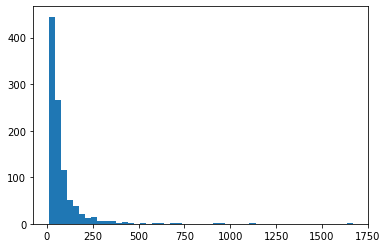

In [10]:
plt.hist(df['income'],bins=50)

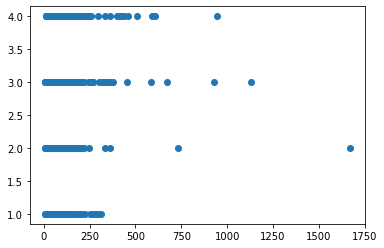

In [12]:
plt.scatter(df['income'],df['custcat'])

In [13]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [16]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
y=df[['custcat']]
x.values
x[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [17]:
y.values
y[0:5]

,custcat
0,1
1,4
2,3
3,1
4,3


#Normalize Data

In [18]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype('float'))

In [20]:
x

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

#Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (800, 11) (800, 1)
test set: (200, 11) (200, 1)


Classification

In [25]:
#K nearest neighbor (K-NN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Training
Lets start the algorithm with k=4 for now:

In [28]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

Predicting

In [29]:
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

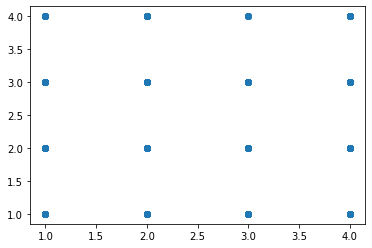

In [36]:
plt.scatter(y_test,yhat)

In [32]:
#Accuracy evaluation

In [37]:
from sklearn import metrics

In [39]:
print("test set accuracy:",metrics.accuracy_score(y_test,yhat))
print("train set accuracy",metrics.accuracy_score(y_train,neigh.predict(x_train)))

test set accuracy: 0.32
train set accuracy 0.5475
